In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## 6 学習に関するテクニック

### 6.1.2 SGD

In [3]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

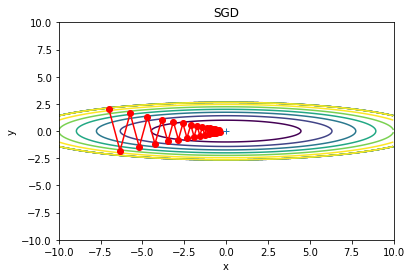

In [4]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.4 Momentum

In [5]:
class Momentum: 
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads): 
        if self.v is None: 
            self.v = {}
            for key, val in params.item(): 
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys(): 
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

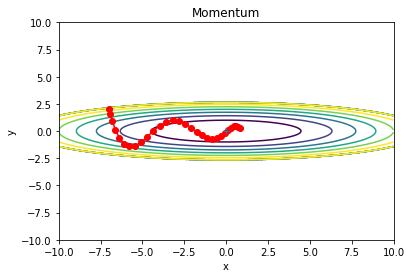

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["Momentum"] = Momentum(lr=0.1)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.5 AdaGrad

In [7]:
class AdaGrad: 
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads): 
        if self.h is None: 
            self.h - {}
            for key, val in params.items(): 
                self.h[key] = np.zeros_like(val)
                
            for key in params.key(): 
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7は0割対策

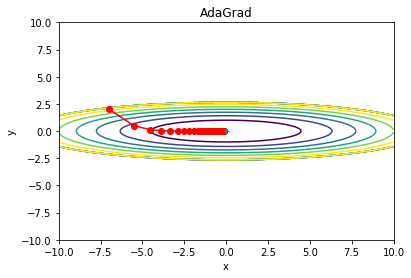

In [8]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["AdaGrad"] = AdaGrad(lr=1.5)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.6 Adam

In [9]:
# Adam (http://arxiv.org/abs/1412.6980v8)
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

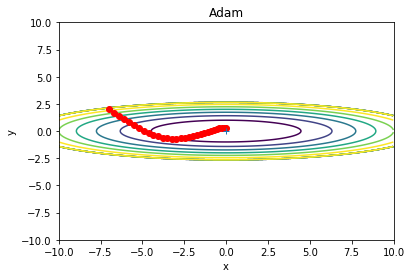

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    # plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

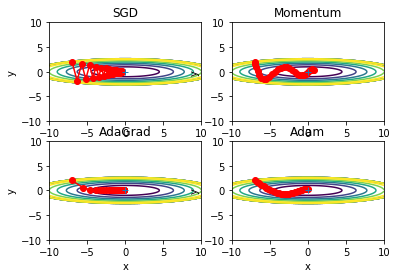

In [11]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.8 MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.4008658771695015
Momentum:2.3282549558168117
AdaGrad:2.3820027153508634
Adam:2.1389773521800803
===========iteration:100===========
SGD:1.4926525996775895
Momentum:0.32979352593459693
AdaGrad:0.1746503399264795
Adam:0.30958588083810307
===========iteration:200===========
SGD:0.7491564479700884
Momentum:0.3630515737050868
AdaGrad:0.1656716326510666
Adam:0.25010169288457174
===========iteration:300===========
SGD:0.6439426163775923
Momentum:0.36808665980276584
AdaGrad:0.16055034118686812
Adam:0.1911610308277713
===========iteration:400===========
SGD:0.4503770210855979
Momentum:0.19794033268068453
AdaGrad:0.07654264634419297
Adam:0.1400125664415777
===========iteration:500===========
SGD:0.399742373001037
Momentum:0.22415842432447058
AdaGrad:0.07956216497021917
Adam:0.17329624201288935
===========iteration:600===========
SGD:0.33193052668704937
Momentum:0.16758074479965188
AdaGrad:0.059766795343582216
Adam:0.09206681616284787
===========iteration:7

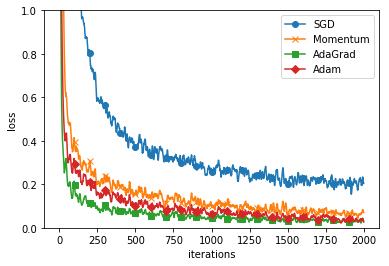

In [12]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 重みの初期値

### 6.2.2 隠れ層のアクティベーション分布

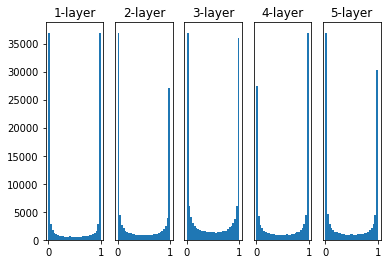

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1        # σ = 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

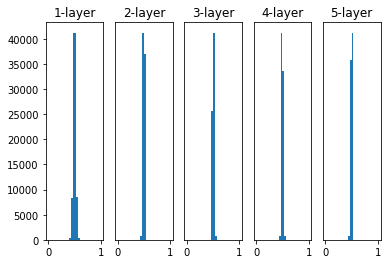

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01       # σ = 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

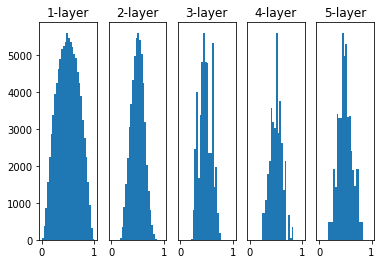

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

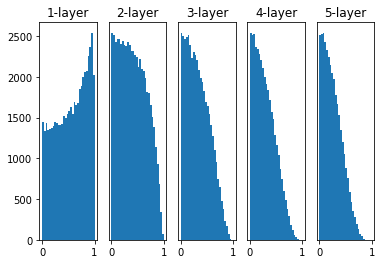

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

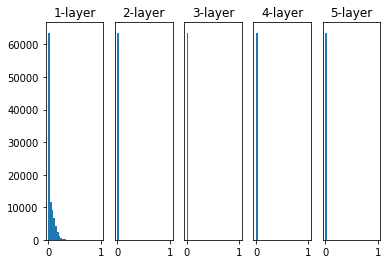

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

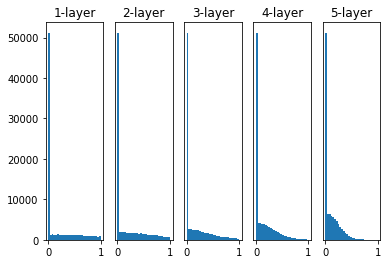

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # Heの初期値


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

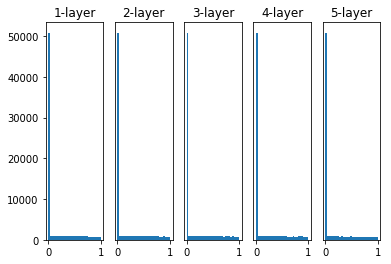

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100          # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5   # 隠れ層が5層
activations = {}        # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1 
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)   # Xavierの初期値
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # Heの初期値


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302497098998039
Xavier:2.315675045581143
He:2.420265464968029
===========iteration:100===========
std=0.01:2.3025402171990503
Xavier:2.2590468463098006
He:1.3613886723849866
===========iteration:200===========
std=0.01:2.3000525399696654
Xavier:2.1123584702370337
He:0.6980765358981905
===========iteration:300===========
std=0.01:2.301132800211459
Xavier:1.7417899898862474
He:0.4575616795884083
===========iteration:400===========
std=0.01:2.3031149978753254
Xavier:1.206386195382299
He:0.42695957560642916
===========iteration:500===========
std=0.01:2.3014175961887977
Xavier:0.8400798138971186
He:0.38456987338931237
===========iteration:600===========
std=0.01:2.3015679178870974
Xavier:0.5934934423268061
He:0.39157872363963614
===========iteration:700===========
std=0.01:2.300374590946277
Xavier:0.42670534607558075
He:0.23491448428019474
===========iteration:800===========
std=0.01:2.301097612914382
Xavier:0.47051640194871086
He:0.324019638147

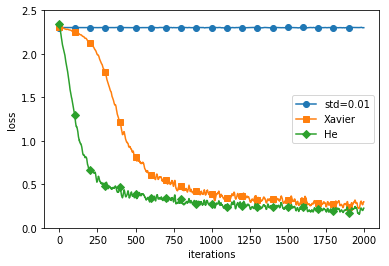

In [20]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.3 Batch Normalization

### 6.3.2 Batch Normalizationの評価

============== 1/16 ==============
epoch:0 | 0.117 - 0.071
epoch:1 | 0.117 - 0.085
epoch:2 | 0.097 - 0.104
epoch:3 | 0.097 - 0.136
epoch:4 | 0.097 - 0.152
epoch:5 | 0.097 - 0.181
epoch:6 | 0.097 - 0.201
epoch:7 | 0.097 - 0.219
epoch:8 | 0.097 - 0.238
epoch:9 | 0.097 - 0.263
epoch:10 | 0.097 - 0.277
epoch:11 | 0.097 - 0.289
epoch:12 | 0.097 - 0.299
epoch:13 | 0.097 - 0.311
epoch:14 | 0.097 - 0.324
epoch:15 | 0.097 - 0.342
epoch:16 | 0.097 - 0.344
epoch:17 | 0.097 - 0.351
epoch:18 | 0.097 - 0.365


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.383
============== 2/16 ==============
epoch:0 | 0.117 - 0.127
epoch:1 | 0.097 - 0.141
epoch:2 | 0.097 - 0.148
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.177
epoch:5 | 0.097 - 0.197
epoch:6 | 0.097 - 0.211
epoch:7 | 0.097 - 0.232
epoch:8 | 0.097 - 0.264
epoch:9 | 0.097 - 0.291
epoch:10 | 0.097 - 0.317
epoch:11 | 0.097 - 0.348
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.386
epoch:14 | 0.097 - 0.398
epoch:15 | 0.097 - 0.424
epoch:16 | 0.097 - 0.435
epoch:17 | 0.097 - 0.442
epoch:18 | 0.097 - 0.46


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.486
============== 3/16 ==============
epoch:0 | 0.094 - 0.092
epoch:1 | 0.369 - 0.106
epoch:2 | 0.497 - 0.14
epoch:3 | 0.59 - 0.188
epoch:4 | 0.672 - 0.223
epoch:5 | 0.745 - 0.268
epoch:6 | 0.779 - 0.308
epoch:7 | 0.795 - 0.337
epoch:8 | 0.838 - 0.367
epoch:9 | 0.846 - 0.41
epoch:10 | 0.874 - 0.435
epoch:11 | 0.899 - 0.456
epoch:12 | 0.901 - 0.489
epoch:13 | 0.925 - 0.503
epoch:14 | 0.942 - 0.525
epoch:15 | 0.946 - 0.555
epoch:16 | 0.96 - 0.576
epoch:17 | 0.962 - 0.597
epoch:18 | 0.971 - 0.619


No handles with labels found to put in legend.


epoch:19 | 0.973 - 0.632
============== 4/16 ==============
epoch:0 | 0.12 - 0.099
epoch:1 | 0.223 - 0.134
epoch:2 | 0.352 - 0.235
epoch:3 | 0.431 - 0.321
epoch:4 | 0.524 - 0.374
epoch:5 | 0.608 - 0.43
epoch:6 | 0.64 - 0.484
epoch:7 | 0.672 - 0.527
epoch:8 | 0.702 - 0.581
epoch:9 | 0.723 - 0.602
epoch:10 | 0.745 - 0.649
epoch:11 | 0.759 - 0.668
epoch:12 | 0.774 - 0.705
epoch:13 | 0.796 - 0.722
epoch:14 | 0.795 - 0.734
epoch:15 | 0.815 - 0.751
epoch:16 | 0.833 - 0.763
epoch:17 | 0.836 - 0.78
epoch:18 | 0.851 - 0.787


No handles with labels found to put in legend.


epoch:19 | 0.85 - 0.79
============== 5/16 ==============
epoch:0 | 0.095 - 0.103
epoch:1 | 0.099 - 0.114
epoch:2 | 0.107 - 0.243
epoch:3 | 0.112 - 0.401
epoch:4 | 0.114 - 0.513
epoch:5 | 0.118 - 0.588
epoch:6 | 0.119 - 0.641
epoch:7 | 0.12 - 0.688
epoch:8 | 0.123 - 0.722
epoch:9 | 0.124 - 0.745
epoch:10 | 0.126 - 0.772
epoch:11 | 0.129 - 0.793
epoch:12 | 0.132 - 0.812
epoch:13 | 0.136 - 0.826
epoch:14 | 0.149 - 0.845
epoch:15 | 0.142 - 0.852
epoch:16 | 0.156 - 0.864
epoch:17 | 0.167 - 0.88
epoch:18 | 0.19 - 0.883


No handles with labels found to put in legend.


epoch:19 | 0.194 - 0.89
============== 6/16 ==============
epoch:0 | 0.079 - 0.097
epoch:1 | 0.105 - 0.223
epoch:2 | 0.122 - 0.479
epoch:3 | 0.116 - 0.587
epoch:4 | 0.116 - 0.668
epoch:5 | 0.116 - 0.712
epoch:6 | 0.116 - 0.761
epoch:7 | 0.118 - 0.795
epoch:8 | 0.151 - 0.822
epoch:9 | 0.119 - 0.835
epoch:10 | 0.116 - 0.862
epoch:11 | 0.116 - 0.876
epoch:12 | 0.116 - 0.891
epoch:13 | 0.116 - 0.902
epoch:14 | 0.135 - 0.908
epoch:15 | 0.129 - 0.926
epoch:16 | 0.118 - 0.934
epoch:17 | 0.116 - 0.939
epoch:18 | 0.116 - 0.94


No handles with labels found to put in legend.


epoch:19 | 0.125 - 0.952
============== 7/16 ==============
epoch:0 | 0.105 - 0.107
epoch:1 | 0.117 - 0.262
epoch:2 | 0.117 - 0.559
epoch:3 | 0.116 - 0.652
epoch:4 | 0.105 - 0.72
epoch:5 | 0.116 - 0.764
epoch:6 | 0.116 - 0.82
epoch:7 | 0.116 - 0.85
epoch:8 | 0.116 - 0.869
epoch:9 | 0.116 - 0.882
epoch:10 | 0.117 - 0.9
epoch:11 | 0.117 - 0.917
epoch:12 | 0.117 - 0.936
epoch:13 | 0.117 - 0.949
epoch:14 | 0.117 - 0.953
epoch:15 | 0.117 - 0.962
epoch:16 | 0.117 - 0.974
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.985


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.986
============== 8/16 ==============
epoch:0 | 0.099 - 0.101
epoch:1 | 0.117 - 0.419
epoch:2 | 0.117 - 0.642
epoch:3 | 0.117 - 0.727
epoch:4 | 0.116 - 0.782
epoch:5 | 0.116 - 0.803
epoch:6 | 0.116 - 0.835
epoch:7 | 0.116 - 0.871
epoch:8 | 0.116 - 0.907
epoch:9 | 0.117 - 0.95
epoch:10 | 0.117 - 0.961
epoch:11 | 0.116 - 0.973
epoch:12 | 0.116 - 0.984
epoch:13 | 0.116 - 0.985
epoch:14 | 0.116 - 0.988
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.087 - 0.121
epoch:1 | 0.1 - 0.466
epoch:2 | 0.117 - 0.725
epoch:3 | 0.117 - 0.834
epoch:4 | 0.117 - 0.879
epoch:5 | 0.117 - 0.946
epoch:6 | 0.117 - 0.967
epoch:7 | 0.116 - 0.977
epoch:8 | 0.116 - 0.986
epoch:9 | 0.116 - 0.989
epoch:10 | 0.116 - 0.99
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.998
epoch:14 | 0.116 - 0.999
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.145
epoch:1 | 0.116 - 0.616
epoch:2 | 0.116 - 0.802
epoch:3 | 0.116 - 0.849
epoch:4 | 0.116 - 0.873
epoch:5 | 0.116 - 0.881
epoch:6 | 0.116 - 0.891
epoch:7 | 0.116 - 0.92
epoch:8 | 0.116 - 0.975
epoch:9 | 0.116 - 0.983
epoch:10 | 0.116 - 0.989
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.991
epoch:16 | 0.116 - 0.992
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.948
============== 11/16 ==============
epoch:0 | 0.099 - 0.17
epoch:1 | 0.116 - 0.677
epoch:2 | 0.116 - 0.65
epoch:3 | 0.116 - 0.807
epoch:4 | 0.116 - 0.819
epoch:5 | 0.116 - 0.856
epoch:6 | 0.116 - 0.825
epoch:7 | 0.116 - 0.877
epoch:8 | 0.117 - 0.873
epoch:9 | 0.116 - 0.89
epoch:10 | 0.116 - 0.897
epoch:11 | 0.116 - 0.897
epoch:12 | 0.116 - 0.877
epoch:13 | 0.116 - 0.899
epoch:14 | 0.116 - 0.899
epoch:15 | 0.117 - 0.958
epoch:16 | 0.117 - 0.985
epoch:17 | 0.117 - 0.992
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.97
============== 12/16 ==============
epoch:0 | 0.117 - 0.135
epoch:1 | 0.117 - 0.381
epoch:2 | 0.117 - 0.598
epoch:3 | 0.117 - 0.576
epoch:4 | 0.117 - 0.644
epoch:5 | 0.117 - 0.634
epoch:6 | 0.117 - 0.667
epoch:7 | 0.117 - 0.667
epoch:8 | 0.117 - 0.71
epoch:9 | 0.117 - 0.711
epoch:10 | 0.117 - 0.803
epoch:11 | 0.117 - 0.777
epoch:12 | 0.117 - 0.796
epoch:13 | 0.116 - 0.79
epoch:14 | 0.116 - 0.811
epoch:15 | 0.116 - 0.809
epoch:16 | 0.116 - 0.811
epoch:17 | 0.116 - 0.811
epoch:18 | 0.116 - 0.811


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.81
============== 13/16 ==============
epoch:0 | 0.117 - 0.209
epoch:1 | 0.117 - 0.48
epoch:2 | 0.116 - 0.573
epoch:3 | 0.117 - 0.584
epoch:4 | 0.117 - 0.613
epoch:5 | 0.117 - 0.616
epoch:6 | 0.117 - 0.648
epoch:7 | 0.117 - 0.676
epoch:8 | 0.117 - 0.676
epoch:9 | 0.116 - 0.679
epoch:10 | 0.116 - 0.635
epoch:11 | 0.116 - 0.676
epoch:12 | 0.116 - 0.699
epoch:13 | 0.116 - 0.657
epoch:14 | 0.116 - 0.692
epoch:15 | 0.117 - 0.682
epoch:16 | 0.117 - 0.671
epoch:17 | 0.117 - 0.697
epoch:18 | 0.117 - 0.62


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.622
============== 14/16 ==============
epoch:0 | 0.116 - 0.097
epoch:1 | 0.116 - 0.342
epoch:2 | 0.116 - 0.384
epoch:3 | 0.116 - 0.429
epoch:4 | 0.116 - 0.473
epoch:5 | 0.116 - 0.477
epoch:6 | 0.116 - 0.483
epoch:7 | 0.117 - 0.476
epoch:8 | 0.117 - 0.488
epoch:9 | 0.117 - 0.488
epoch:10 | 0.117 - 0.506
epoch:11 | 0.117 - 0.512
epoch:12 | 0.117 - 0.509
epoch:13 | 0.117 - 0.504
epoch:14 | 0.117 - 0.509
epoch:15 | 0.117 - 0.517
epoch:16 | 0.117 - 0.513
epoch:17 | 0.117 - 0.516
epoch:18 | 0.117 - 0.517


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.518
============== 15/16 ==============
epoch:0 | 0.117 - 0.106
epoch:1 | 0.117 - 0.357
epoch:2 | 0.117 - 0.405
epoch:3 | 0.116 - 0.482
epoch:4 | 0.116 - 0.5
epoch:5 | 0.116 - 0.533
epoch:6 | 0.116 - 0.511
epoch:7 | 0.116 - 0.494
epoch:8 | 0.116 - 0.503
epoch:9 | 0.116 - 0.519
epoch:10 | 0.116 - 0.526
epoch:11 | 0.116 - 0.529
epoch:12 | 0.116 - 0.52
epoch:13 | 0.116 - 0.526
epoch:14 | 0.116 - 0.528
epoch:15 | 0.116 - 0.53
epoch:16 | 0.116 - 0.53
epoch:17 | 0.116 - 0.529
epoch:18 | 0.116 - 0.528


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.528
============== 16/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.117 - 0.276
epoch:2 | 0.117 - 0.384
epoch:3 | 0.117 - 0.395
epoch:4 | 0.117 - 0.409
epoch:5 | 0.117 - 0.418
epoch:6 | 0.117 - 0.415
epoch:7 | 0.117 - 0.418
epoch:8 | 0.117 - 0.418
epoch:9 | 0.117 - 0.402
epoch:10 | 0.117 - 0.442
epoch:11 | 0.117 - 0.481
epoch:12 | 0.117 - 0.485
epoch:13 | 0.117 - 0.473
epoch:14 | 0.116 - 0.513
epoch:15 | 0.116 - 0.521
epoch:16 | 0.116 - 0.518
epoch:17 | 0.116 - 0.521
epoch:18 | 0.116 - 0.527
epoch:19 | 0.116 - 0.524


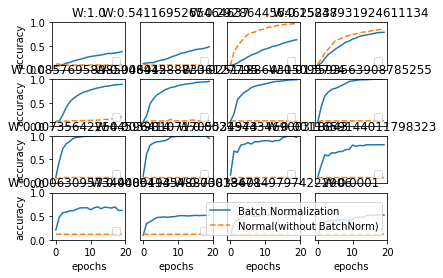

In [21]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 6.4 正規化

### 6.4.1 過学習

epoch:0, train acc:0.09333333333333334, test acc:0.1002
epoch:1, train acc:0.09666666666666666, test acc:0.1088
epoch:2, train acc:0.14333333333333334, test acc:0.1281
epoch:3, train acc:0.16666666666666666, test acc:0.1547
epoch:4, train acc:0.2, test acc:0.1789
epoch:5, train acc:0.23666666666666666, test acc:0.2063
epoch:6, train acc:0.27, test acc:0.2309
epoch:7, train acc:0.2966666666666667, test acc:0.2518
epoch:8, train acc:0.32, test acc:0.2652
epoch:9, train acc:0.38666666666666666, test acc:0.2916
epoch:10, train acc:0.38666666666666666, test acc:0.3099
epoch:11, train acc:0.4033333333333333, test acc:0.319
epoch:12, train acc:0.45, test acc:0.3412
epoch:13, train acc:0.4666666666666667, test acc:0.3505
epoch:14, train acc:0.49333333333333335, test acc:0.3647
epoch:15, train acc:0.54, test acc:0.3895
epoch:16, train acc:0.5666666666666667, test acc:0.4097
epoch:17, train acc:0.5933333333333334, test acc:0.4378
epoch:18, train acc:0.5866666666666667, test acc:0.443
epoch:19, t

epoch:167, train acc:1.0, test acc:0.7766
epoch:168, train acc:1.0, test acc:0.7762
epoch:169, train acc:1.0, test acc:0.7765
epoch:170, train acc:1.0, test acc:0.7763
epoch:171, train acc:1.0, test acc:0.7777
epoch:172, train acc:1.0, test acc:0.7763
epoch:173, train acc:1.0, test acc:0.7777
epoch:174, train acc:1.0, test acc:0.7776
epoch:175, train acc:1.0, test acc:0.7766
epoch:176, train acc:1.0, test acc:0.7768
epoch:177, train acc:1.0, test acc:0.7777
epoch:178, train acc:1.0, test acc:0.7754
epoch:179, train acc:1.0, test acc:0.7752
epoch:180, train acc:1.0, test acc:0.7766
epoch:181, train acc:1.0, test acc:0.7775
epoch:182, train acc:1.0, test acc:0.7775
epoch:183, train acc:1.0, test acc:0.7769
epoch:184, train acc:1.0, test acc:0.778
epoch:185, train acc:1.0, test acc:0.777
epoch:186, train acc:1.0, test acc:0.7785
epoch:187, train acc:1.0, test acc:0.7777
epoch:188, train acc:1.0, test acc:0.7761
epoch:189, train acc:1.0, test acc:0.7773
epoch:190, train acc:1.0, test acc:0

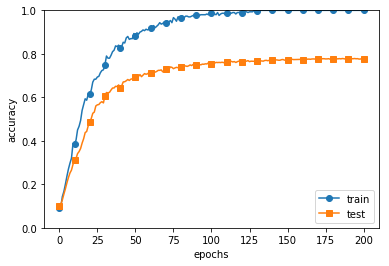

In [22]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0  # weight decayを使用しない場合
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.2 Weight decay

epoch:0, train acc:0.08333333333333333, test acc:0.0809
epoch:1, train acc:0.08, test acc:0.0822
epoch:2, train acc:0.10333333333333333, test acc:0.0886
epoch:3, train acc:0.14333333333333334, test acc:0.108
epoch:4, train acc:0.19666666666666666, test acc:0.1446
epoch:5, train acc:0.2633333333333333, test acc:0.1726
epoch:6, train acc:0.3233333333333333, test acc:0.2007
epoch:7, train acc:0.34, test acc:0.2174
epoch:8, train acc:0.36, test acc:0.2321
epoch:9, train acc:0.38333333333333336, test acc:0.2427
epoch:10, train acc:0.39666666666666667, test acc:0.2568
epoch:11, train acc:0.42333333333333334, test acc:0.2678
epoch:12, train acc:0.43333333333333335, test acc:0.2854
epoch:13, train acc:0.4533333333333333, test acc:0.2966
epoch:14, train acc:0.4866666666666667, test acc:0.3178
epoch:15, train acc:0.49666666666666665, test acc:0.3287
epoch:16, train acc:0.5, test acc:0.3485
epoch:17, train acc:0.5333333333333333, test acc:0.3668
epoch:18, train acc:0.5333333333333333, test acc:0.

epoch:158, train acc:0.9233333333333333, test acc:0.7261
epoch:159, train acc:0.9033333333333333, test acc:0.718
epoch:160, train acc:0.8966666666666666, test acc:0.7162
epoch:161, train acc:0.9, test acc:0.7259
epoch:162, train acc:0.8966666666666666, test acc:0.7216
epoch:163, train acc:0.9066666666666666, test acc:0.7237
epoch:164, train acc:0.9033333333333333, test acc:0.7331
epoch:165, train acc:0.9166666666666666, test acc:0.7278
epoch:166, train acc:0.9066666666666666, test acc:0.7321
epoch:167, train acc:0.9033333333333333, test acc:0.7296
epoch:168, train acc:0.9266666666666666, test acc:0.7386
epoch:169, train acc:0.9233333333333333, test acc:0.729
epoch:170, train acc:0.9133333333333333, test acc:0.7293
epoch:171, train acc:0.91, test acc:0.7338
epoch:172, train acc:0.9066666666666666, test acc:0.7278
epoch:173, train acc:0.9033333333333333, test acc:0.7317
epoch:174, train acc:0.92, test acc:0.7342
epoch:175, train acc:0.9033333333333333, test acc:0.7168
epoch:176, train ac

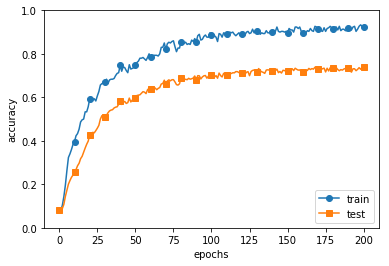

In [23]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0  # weight decayを使用しない場合
weight_decay_lambda = 0.1 # weight decayを使用する場合
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3 Dropout

In [24]:
class Dropout: 
    def __init__(self, dropout_ratio = 0.5): 
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True): 
        if train_fig: 
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else: 
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout): 
        return dout * self.mask

train loss:2.2829456048240173
=== epoch:1, train acc:0.13, test acc:0.1156 ===
train loss:2.3128977277197706
train loss:2.314956056108795
train loss:2.30481642362558
=== epoch:2, train acc:0.13, test acc:0.1156 ===
train loss:2.311107580650898
train loss:2.315388903434478
train loss:2.3139648702337006
=== epoch:3, train acc:0.13, test acc:0.1158 ===
train loss:2.3130254448415912
train loss:2.305237513861572
train loss:2.306921857511719
=== epoch:4, train acc:0.13, test acc:0.1156 ===
train loss:2.310297515130078
train loss:2.288632830283031
train loss:2.2870517150242247
=== epoch:5, train acc:0.13, test acc:0.1156 ===
train loss:2.296406473214102
train loss:2.3073061306128997
train loss:2.292358315200883
=== epoch:6, train acc:0.13, test acc:0.1158 ===
train loss:2.2817244231793268
train loss:2.282022370042412
train loss:2.2828658653592098
=== epoch:7, train acc:0.13, test acc:0.1157 ===
train loss:2.27851338679428
train loss:2.3168091776017263
train loss:2.288298732605069
=== epoch:8,

=== epoch:56, train acc:0.14666666666666667, test acc:0.1276 ===
train loss:2.23081038079805
train loss:2.248643517132594
train loss:2.2014332422678624
=== epoch:57, train acc:0.15333333333333332, test acc:0.1283 ===
train loss:2.2387708911138584
train loss:2.2177076296265423
train loss:2.220315434255562
=== epoch:58, train acc:0.15666666666666668, test acc:0.1289 ===
train loss:2.229776559349611
train loss:2.236869107158182
train loss:2.214585547409955
=== epoch:59, train acc:0.15666666666666668, test acc:0.1318 ===
train loss:2.2152628185690446
train loss:2.2357831728257764
train loss:2.218729833620042
=== epoch:60, train acc:0.15666666666666668, test acc:0.1351 ===
train loss:2.236958955011962
train loss:2.2136763257587915
train loss:2.2366998005176084
=== epoch:61, train acc:0.16, test acc:0.1368 ===
train loss:2.2535640860377275
train loss:2.223174130414822
train loss:2.216948879741806
=== epoch:62, train acc:0.16333333333333333, test acc:0.1403 ===
train loss:2.225557290350932
tr

=== epoch:111, train acc:0.27666666666666667, test acc:0.2223 ===
train loss:2.0828073610744493
train loss:2.109863507656394
train loss:2.0931617729116296
=== epoch:112, train acc:0.28, test acc:0.2246 ===
train loss:2.0757134859341506
train loss:2.0449721318559773
train loss:2.0911044534534224
=== epoch:113, train acc:0.2733333333333333, test acc:0.2226 ===
train loss:2.095445680329419
train loss:2.0792952676222956
train loss:2.031968972807315
=== epoch:114, train acc:0.2733333333333333, test acc:0.2225 ===
train loss:2.081623079600948
train loss:2.0998441004867714
train loss:2.0588293877961097
=== epoch:115, train acc:0.2733333333333333, test acc:0.2228 ===
train loss:2.1085582311123967
train loss:2.092706108270534
train loss:2.1295460704965223
=== epoch:116, train acc:0.27666666666666667, test acc:0.2231 ===
train loss:2.0686116922287856
train loss:2.057908484931735
train loss:2.052736179222855
=== epoch:117, train acc:0.28, test acc:0.2241 ===
train loss:2.019227118178753
train los

=== epoch:166, train acc:0.36333333333333334, test acc:0.3083 ===
train loss:1.862211341221093
train loss:1.986493368075867
train loss:1.8788796959182374
=== epoch:167, train acc:0.37, test acc:0.3101 ===
train loss:1.8797696922288132
train loss:1.9454739859275298
train loss:1.9495288390334309
=== epoch:168, train acc:0.37333333333333335, test acc:0.3066 ===
train loss:1.7971237512615972
train loss:1.9045409840864238
train loss:1.9120184803662854
=== epoch:169, train acc:0.37333333333333335, test acc:0.3079 ===
train loss:2.0073402053060043
train loss:1.9840714992800628
train loss:1.989470605874651
=== epoch:170, train acc:0.38, test acc:0.3088 ===
train loss:1.9226374911980135
train loss:1.852265948179017
train loss:1.9530302095332095
=== epoch:171, train acc:0.38333333333333336, test acc:0.3131 ===
train loss:1.865516480669069
train loss:1.9414077704223005
train loss:1.8397193965424297
=== epoch:172, train acc:0.38666666666666666, test acc:0.3141 ===
train loss:1.8218993312065055
tra

=== epoch:221, train acc:0.4633333333333333, test acc:0.3716 ===
train loss:1.659051649516845
train loss:1.6876021411565358
train loss:1.6618304754635775
=== epoch:222, train acc:0.4633333333333333, test acc:0.3721 ===
train loss:1.6904568709420067
train loss:1.4850294541545914
train loss:1.7158465937103224
=== epoch:223, train acc:0.46, test acc:0.3716 ===
train loss:1.6980435049586273
train loss:1.526396010228268
train loss:1.7513220077789993
=== epoch:224, train acc:0.4633333333333333, test acc:0.372 ===
train loss:1.6496981988811632
train loss:1.6490158487212063
train loss:1.7466183320933384
=== epoch:225, train acc:0.47333333333333333, test acc:0.3766 ===
train loss:1.6406946147502837
train loss:1.6951234458859465
train loss:1.6889884422046828
=== epoch:226, train acc:0.47333333333333333, test acc:0.3787 ===
train loss:1.574415566620576
train loss:1.6181193565006833
train loss:1.7850225036247052
=== epoch:227, train acc:0.47333333333333333, test acc:0.3785 ===
train loss:1.6650580

=== epoch:276, train acc:0.49333333333333335, test acc:0.4155 ===
train loss:1.519848583851548
train loss:1.3324595091043574
train loss:1.5654152128838945
=== epoch:277, train acc:0.49333333333333335, test acc:0.416 ===
train loss:1.5366900703065476
train loss:1.4870080796623384
train loss:1.4294154656761742
=== epoch:278, train acc:0.5033333333333333, test acc:0.4187 ===
train loss:1.4839156138049208
train loss:1.4013122474394302
train loss:1.3640511498767283
=== epoch:279, train acc:0.49333333333333335, test acc:0.4173 ===
train loss:1.5426303099576417
train loss:1.4204823199854955
train loss:1.4668757226358766
=== epoch:280, train acc:0.5033333333333333, test acc:0.4195 ===
train loss:1.4883592370094463
train loss:1.5190089417898704
train loss:1.4670710648218526
=== epoch:281, train acc:0.5066666666666667, test acc:0.4246 ===
train loss:1.4957138212695682
train loss:1.4005070173396874
train loss:1.4981384859783795
=== epoch:282, train acc:0.51, test acc:0.4285 ===
train loss:1.56732

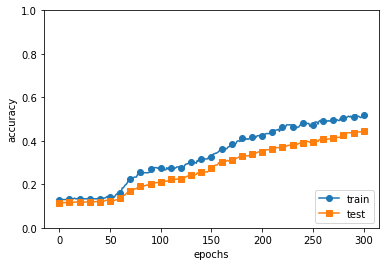

In [25]:
# Dropoutあり
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.3709524080570104
=== epoch:1, train acc:0.07666666666666666, test acc:0.1081 ===
train loss:2.419668579436337
train loss:2.356913289674545
train loss:2.2626742731680434
=== epoch:2, train acc:0.08333333333333333, test acc:0.1134 ===
train loss:2.3378536995490378
train loss:2.2778926491700027
train loss:2.3083566924395353
=== epoch:3, train acc:0.11, test acc:0.1263 ===
train loss:2.3015477106704676
train loss:2.3074358202291454
train loss:2.2837710429335085
=== epoch:4, train acc:0.12666666666666668, test acc:0.1423 ===
train loss:2.251436244442773
train loss:2.2822463116655087
train loss:2.240812443618194
=== epoch:5, train acc:0.13333333333333333, test acc:0.153 ===
train loss:2.266597321814109
train loss:2.2281357682530816
train loss:2.2727316539455145
=== epoch:6, train acc:0.13, test acc:0.169 ===
train loss:2.223174423683072
train loss:2.2526625746466906
train loss:2.1959482622071156
=== epoch:7, train acc:0.15, test acc:0.1773 ===
train loss:2.2168542259550605
train

=== epoch:57, train acc:0.8933333333333333, test acc:0.6688 ===
train loss:0.5989426979196903
train loss:0.5595937904435485
train loss:0.6059922799132519
=== epoch:58, train acc:0.9, test acc:0.6671 ===
train loss:0.49737363903582854
train loss:0.5624498029564441
train loss:0.5470041633210009
=== epoch:59, train acc:0.9033333333333333, test acc:0.6761 ===
train loss:0.6067836891742622
train loss:0.39760165103039247
train loss:0.4642255109006217
=== epoch:60, train acc:0.9, test acc:0.6778 ===
train loss:0.44292902394421335
train loss:0.45120865575303687
train loss:0.4491759403289663
=== epoch:61, train acc:0.89, test acc:0.6789 ===
train loss:0.38960266401188876
train loss:0.4465697408111797
train loss:0.4273403554498898
=== epoch:62, train acc:0.9, test acc:0.6744 ===
train loss:0.44857029875963195
train loss:0.46277038924930186
train loss:0.38888594506871166
=== epoch:63, train acc:0.91, test acc:0.6833 ===
train loss:0.3827429844296659
train loss:0.44838641279562386
train loss:0.488

=== epoch:112, train acc:0.9966666666666667, test acc:0.7342 ===
train loss:0.11256671050319488
train loss:0.10754200056184296
train loss:0.0801075324821119
=== epoch:113, train acc:0.9966666666666667, test acc:0.736 ===
train loss:0.09732452951440593
train loss:0.09333166820964141
train loss:0.08619217294321502
=== epoch:114, train acc:1.0, test acc:0.7326 ===
train loss:0.08381850862927236
train loss:0.1013951793110162
train loss:0.07706343150925489
=== epoch:115, train acc:1.0, test acc:0.7411 ===
train loss:0.09683917373280063
train loss:0.07169399006441168
train loss:0.0872465559989522
=== epoch:116, train acc:1.0, test acc:0.7411 ===
train loss:0.09501163636539489
train loss:0.08775854185431026
train loss:0.08105135085554632
=== epoch:117, train acc:1.0, test acc:0.739 ===
train loss:0.07598510748960204
train loss:0.07966943715458476
train loss:0.08467885706499838
=== epoch:118, train acc:1.0, test acc:0.7401 ===
train loss:0.08427854705419677
train loss:0.07725837700094312
train

=== epoch:169, train acc:1.0, test acc:0.749 ===
train loss:0.03273619574402439
train loss:0.029690086385239435
train loss:0.03247700815753206
=== epoch:170, train acc:1.0, test acc:0.7485 ===
train loss:0.023747132062321742
train loss:0.02865814762729528
train loss:0.02605099927312655
=== epoch:171, train acc:1.0, test acc:0.7503 ===
train loss:0.02699303879547339
train loss:0.03515730793557308
train loss:0.03702993071682593
=== epoch:172, train acc:1.0, test acc:0.7484 ===
train loss:0.025058551214666432
train loss:0.03415143413231472
train loss:0.019865797311438876
=== epoch:173, train acc:1.0, test acc:0.751 ===
train loss:0.023372118246750704
train loss:0.03502771537646672
train loss:0.032060588142821714
=== epoch:174, train acc:1.0, test acc:0.7515 ===
train loss:0.02984387910414982
train loss:0.028718964239318384
train loss:0.03429365573429422
=== epoch:175, train acc:1.0, test acc:0.7505 ===
train loss:0.024660174397449074
train loss:0.017918057250323194
train loss:0.0249436598

=== epoch:226, train acc:1.0, test acc:0.7542 ===
train loss:0.014718886049227236
train loss:0.012253981055989415
train loss:0.01713264297070586
=== epoch:227, train acc:1.0, test acc:0.7534 ===
train loss:0.018833638510424407
train loss:0.014715006012793385
train loss:0.012946321883058687
=== epoch:228, train acc:1.0, test acc:0.7541 ===
train loss:0.018831708868727436
train loss:0.016036404293138577
train loss:0.020552654094469866
=== epoch:229, train acc:1.0, test acc:0.752 ===
train loss:0.018167076188315832
train loss:0.013458603082110339
train loss:0.017194377379952358
=== epoch:230, train acc:1.0, test acc:0.7545 ===
train loss:0.01697569825902312
train loss:0.013965168058228575
train loss:0.013889187797535224
=== epoch:231, train acc:1.0, test acc:0.7555 ===
train loss:0.013728514462189463
train loss:0.01458126696594953
train loss:0.012697398934027122
=== epoch:232, train acc:1.0, test acc:0.7548 ===
train loss:0.015110948027353356
train loss:0.016241866116050992
train loss:0.0

=== epoch:283, train acc:1.0, test acc:0.7561 ===
train loss:0.00875776427307463
train loss:0.009737736345235814
train loss:0.012135546693092646
=== epoch:284, train acc:1.0, test acc:0.7569 ===
train loss:0.011015938865200968
train loss:0.00821440776325496
train loss:0.009952484045761838
=== epoch:285, train acc:1.0, test acc:0.7571 ===
train loss:0.009670365102912703
train loss:0.010485295701666326
train loss:0.010600970094377528
=== epoch:286, train acc:1.0, test acc:0.7561 ===
train loss:0.010006061992469773
train loss:0.008825475776072917
train loss:0.00955545182559299
=== epoch:287, train acc:1.0, test acc:0.7581 ===
train loss:0.00774885412608412
train loss:0.011437371777391762
train loss:0.009985378639899711
=== epoch:288, train acc:1.0, test acc:0.7571 ===
train loss:0.009310647305755381
train loss:0.012173936048212632
train loss:0.006589333920076955
=== epoch:289, train acc:1.0, test acc:0.7576 ===
train loss:0.00891515973354847
train loss:0.009414968026576825
train loss:0.01

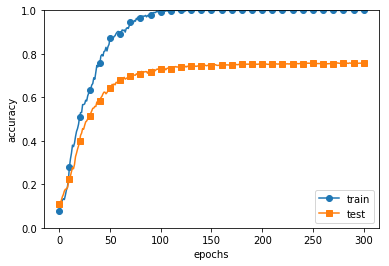

In [26]:
# Dropoutなし
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = False  # Dropoutありのときの場合はTrueに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.5 ハイパーパラメータの検証

### 6.5.1 検証データ

In [27]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 訓練データをシャッフル
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.3 ハイパーパラメータ最適化の実装

In [28]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

val acc:0.09 | lr:1.212858021280865e-06, weight decay:3.171482471999933e-08
val acc:0.74 | lr:0.006581463446747619, weight decay:6.593277432116058e-05
val acc:0.07 | lr:0.00022726868159850827, weight decay:4.8958996133528306e-08
val acc:0.15 | lr:2.6518537228747957e-05, weight decay:2.3335233318226582e-07
val acc:0.05 | lr:1.5759266084644582e-06, weight decay:2.473869304059406e-07
val acc:0.28 | lr:0.001333127624420324, weight decay:2.3665082180353717e-05
val acc:0.14 | lr:4.865990389495278e-06, weight decay:4.201930092167112e-06
val acc:0.17 | lr:0.0005587188860059039, weight decay:1.02995465496959e-07
val acc:0.45 | lr:0.0033007551238228142, weight decay:1.5899172392260578e-08
val acc:0.09 | lr:5.229034573473428e-06, weight decay:6.504206083329022e-05
val acc:0.11 | lr:8.091791450743964e-05, weight decay:6.392795201939974e-06
val acc:0.8 | lr:0.008684059179247567, weight decay:1.2032720510185893e-07
val acc:0.13 | lr:0.0003782496158938505, weight decay:5.1867227750829e-05
val acc:0.0

Best-10(val acc:0.59) | lr:0.0061825756636531256, weight decay:2.3244645579798897e-06
Best-11(val acc:0.45) | lr:0.0033007551238228142, weight decay:1.5899172392260578e-08
Best-12(val acc:0.45) | lr:0.003398157667992556, weight decay:6.046403933770765e-06
Best-13(val acc:0.45) | lr:0.0035505764439767618, weight decay:3.2884189754633315e-08
Best-14(val acc:0.42) | lr:0.0031040932371244776, weight decay:4.995318359772093e-05
Best-15(val acc:0.39) | lr:0.002869893789059998, weight decay:9.277676965123075e-05
Best-16(val acc:0.33) | lr:0.002413429773888019, weight decay:7.069901816708906e-08
Best-17(val acc:0.3) | lr:0.0013865910398745554, weight decay:9.327608094697354e-06
Best-18(val acc:0.3) | lr:0.001912530104595591, weight decay:5.391751981695197e-08
Best-19(val acc:0.3) | lr:0.001692123823031623, weight decay:2.4682145492763985e-07
Best-20(val acc:0.3) | lr:0.0021562948988062616, weight decay:5.463611883826779e-07


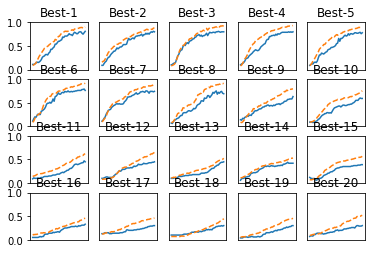

In [29]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4) # 10e-8から10e-4の範囲に設定
    lr = 10 ** np.random.uniform(-6, -2)           # 10e-6から10e-2の範囲に設定
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()